# ARIMA ML MODEL

            id_asset   timestamp     open     high      low    close   
timestamp                                                              
2017-08-17         1  2017-08-17  4261.48  4485.39  4200.74  4285.08  \

                volume               close_time  quote_asset_volume   
timestamp                                                             
2017-08-17  795.150377  2017-08-17 23:59:59.999        3.454770e+06  \

            number_of_trades  taker_buy_base_asset_volume   
timestamp                                                   
2017-08-17              3427                   616.248541  \

            taker_buy_quote_asset_volume  ignore  
timestamp                                         
2017-08-17                  2.678216e+06     0.0  


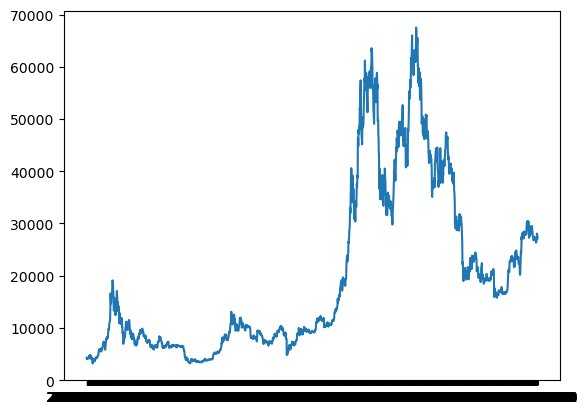

1902 212


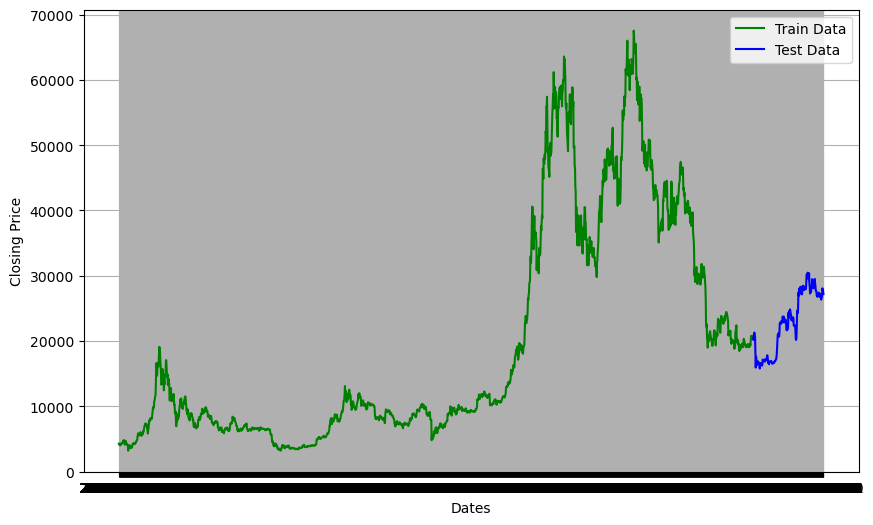

1 ,yhat = 20509.733832058926 , actual value = 20483.62
2 ,yhat = 20485.926227077507 , actual value = 20151.84
3 ,yhat = 20154.551858186187 , actual value = 20207.82
4 ,yhat = 20201.01078604784 , actual value = 21148.52
5 ,yhat = 21107.22330403161 , actual value = 21299.37
6 ,yhat = 21286.47890854931 , actual value = 20905.58
7 ,yhat = 20944.209966679744 , actual value = 20591.13
8 ,yhat = 20634.229248126558 , actual value = 18547.23
9 ,yhat = 18612.525269344707 , actual value = 15922.81
10 ,yhat = 15982.652884103405 , actual value = 17601.15
11 ,yhat = 17484.770787413974 , actual value = 17070.31
12 ,yhat = 16965.383449763467 , actual value = 16812.08
13 ,yhat = 16785.375826218944 , actual value = 16329.85
14 ,yhat = 16383.396812372188 , actual value = 16619.46
15 ,yhat = 16586.82680423833 , actual value = 16900.57
16 ,yhat = 16871.583243358167 , actual value = 16662.76
17 ,yhat = 16663.67713635833 , actual value = 16692.56
18 ,yhat = 16706.985073329495 , actual value = 16700.45
19 ,yh

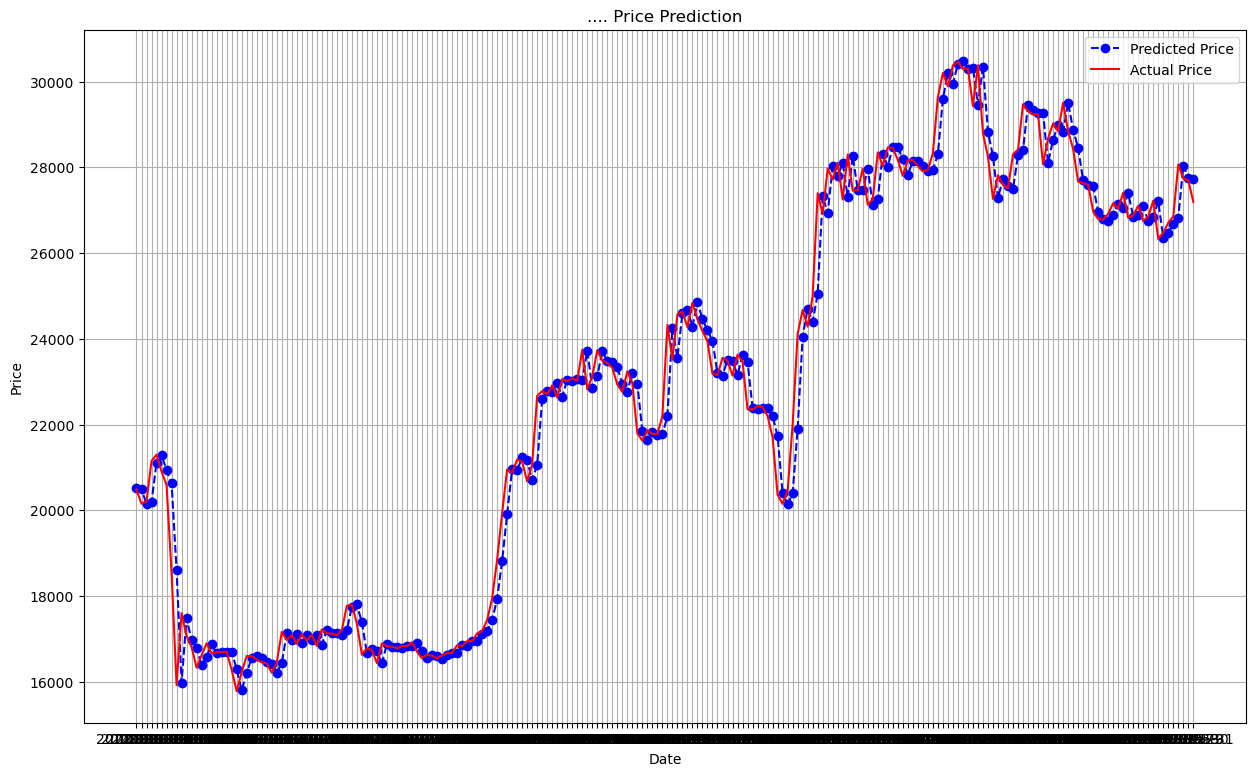

MAPE : 0.017834806212852033


In [2]:
# Recap 
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read Daily Data and select Asset 1 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
display(df.head(3))

# Plot 01- Close Price
plt.plot(df.index, df['close'])
plt.show()


# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]


# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Predictin with ARIMA (Take to much time !!!)
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break
    
# Print Model Summary
print(model_fit.summary())

# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.78% MAPE ==> The model is 98.22% accurate in predicting the test set observation.

In [3]:
df.head()

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-08-17,1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0.0
2017-08-18,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0.0
2017-08-19,1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0.0
2017-08-20,1,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0.0
2017-08-21,1,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0.0


In [6]:
df['close'].head()

timestamp
2017-08-17    4285.08
2017-08-18    4108.37
2017-08-19    4139.98
2017-08-20    4086.29
2017-08-21    4016.00
Name: close, dtype: float64

In [ ]:
# Train test split
train_data = list(df['close'])
n=0 

for i in range(30):
    model = ARIMA(list(train_data), order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    n+=1
    
    print(f'{n} ,yhat = {yhat}')

2071 43
1 ,yhat = 30342.61916828854 , actual value = 28797.1
2 ,yhat = 28829.236598414074 , actual value = 28243.65
3 ,yhat = 28255.754828148296 , actual value = 27262.84
4 ,yhat = 27280.7269908064 , actual value = 27816.85
5 ,yhat = 27732.315339559176 , actual value = 27590.6
6 ,yhat = 27557.393862004774 , actual value = 27510.93
7 ,yhat = 27496.23472238364 , actual value = 28300.79
8 ,yhat = 28286.235405305164 , actual value = 28415.29
9 ,yhat = 28405.069744653298 , actual value = 29472.77
10 ,yhat = 29456.930449013456 , actual value = 29311.7
11 ,yhat = 29348.02264918769 , actual value = 29230.45
12 ,yhat = 29263.162941245515 , actual value = 29233.21
13 ,yhat = 29261.239711983988 , actual value = 28068.26
14 ,yhat = 28098.97609911332 , actual value = 28669.86
15 ,yhat = 28643.640866209764 , actual value = 29026.16
16 ,yhat = 28986.754864027076 , actual value = 28838.16
17 ,yhat = 28825.931690037844 , actual value = 29505.61
18 ,yhat = 29510.30475934901 , actual value = 28848.2
19 ,

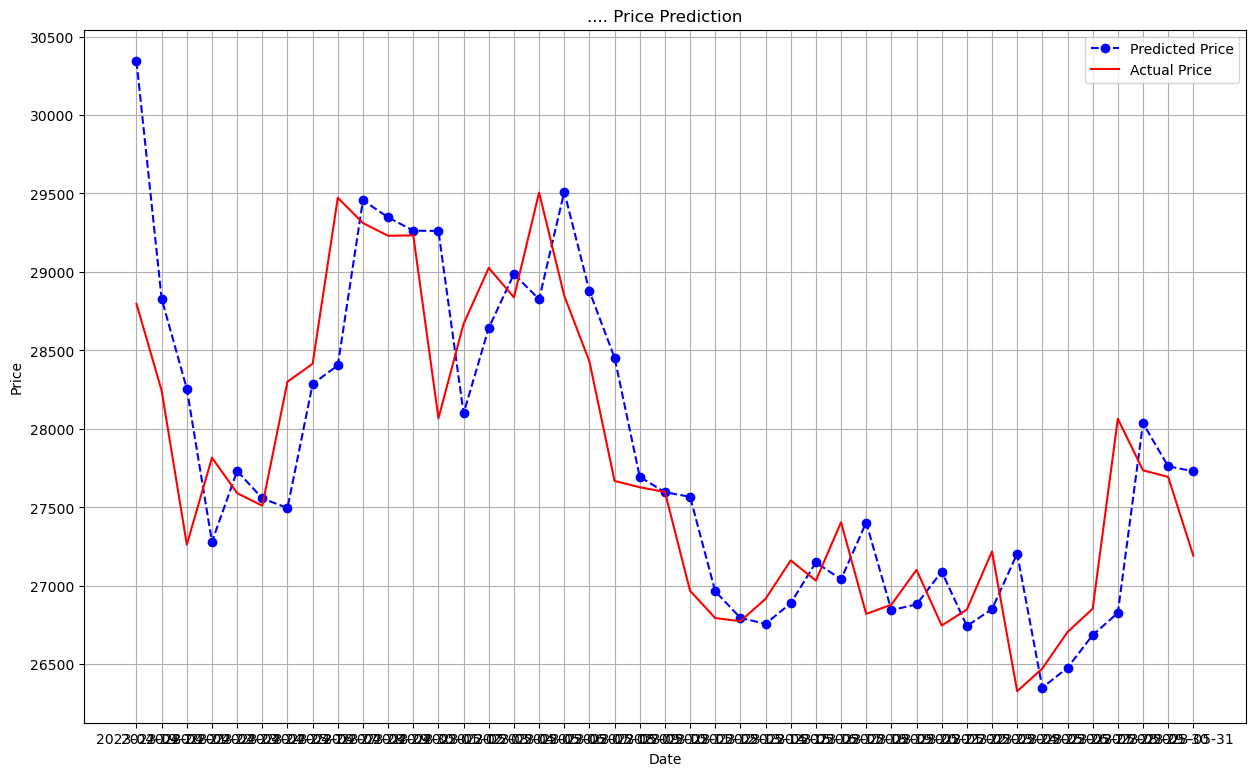

MAPE : 0.014963722868942748


In [33]:
# Train test split
to_row = int(len(df)*0.98) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]

'''
# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()
'''
# Model Predictin with ARIMA (Take to much time !!!)
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break
    
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 

In [34]:
# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 

MAPE : 0.014963722868942748


In [35]:
difference

array([1545.51916829,  585.58659841,  992.91482815,  536.12300919,
        141.71533956,   46.463862  ,  804.55527762,  129.05459469,
       1067.70025535,  145.23044901,  117.57264919,   29.95294125,
       1192.97971198,  570.88390089,  382.51913379,  148.59486403,
        679.67830996,  662.10475935,  447.68954166,  784.50451238,
         66.58252786,    2.03431836,  599.09381774,  170.39847739,
         21.08127899,  159.53099714,  272.37907971,  115.25334517,
        363.6246818 ,  582.32006368,   34.65564923,  220.48102623,
        343.52483131,  104.8014498 ,  367.46102338,  876.2306932 ,
        122.0411224 ,  227.43062314,  167.87932193, 1237.16869434,
        299.82565187,   67.74317085,  537.81713359])

In [37]:
mean_squared_error(test_data, model_predictions)

315543.9178686065

In [29]:
mean_absolute_error(test_data, model_predictions)

537.8171335898005

In [30]:
model_predictions

[27730.4871335898]

In [31]:
test_data

[27192.67]

In [39]:
np.mean(difference)

417.9233182756119

In [40]:
r2_score(test_data, model_predictions)

0.6122813216515326

# Regression ML Model

In [1]:
# Recap 
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read Daily Data and select Asset 1 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
display(df.head(3))

# Null Values
print('Null Values')
display(df.isna().sum())

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-08-17,1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0.0
2017-08-18,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0.0
2017-08-19,1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0.0


Null Values


id_asset                        0
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

## Plot 01- Close Price

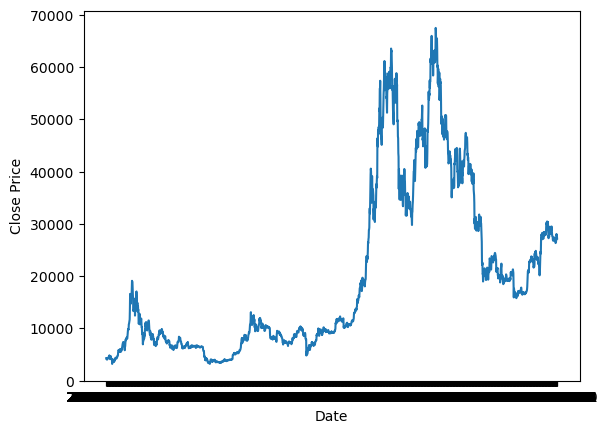

In [2]:
# Plot 01- Close Price
plt.plot(df.index, df['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Drop Time Columns

In [3]:
df = df.drop(['id_asset', 'timestamp', 'close_time', 'ignore'], axis=1)
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541,2.678216e+06
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06


In [4]:
df['diff_open_close'] = df.open - df.close
df['diff_high_low'] = df.high - df.low
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,diff_open_close,diff_high_low
timestamp,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541,2.678216e+06,-23.60,284.65
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06,176.71,432.75
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06,-31.61,334.69
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06,34.69,178.46
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06,53.13,207.83


In [5]:
df.corr()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,diff_open_close,diff_high_low
open,1.000000,0.999226,0.998515,0.998203,0.106264,0.492374,0.272283,0.100854,0.487118,0.032726,0.721882
high,0.999226,1.000000,0.998330,0.999191,0.109650,0.497241,0.274011,0.104600,0.492478,0.003339,0.733713
low,0.998515,0.998330,1.000000,0.998997,0.101315,0.483617,0.270639,0.096588,0.479273,-0.005287,0.693231
close,0.998203,0.999191,0.998997,1.000000,0.105204,0.490502,0.271940,0.100637,0.486370,-0.027225,0.715776
volume,0.106264,0.109650,0.101315,0.105204,1.000000,0.879402,0.931169,0.999529,0.881856,0.017968,0.176317
quote_asset_volume,0.492374,0.497241,0.483617,0.490502,0.879402,1.000000,0.916560,0.877553,0.999585,0.032585,0.515293
number_of_trades,0.272283,0.274011,0.270639,0.271940,0.931169,0.916560,1.000000,0.931127,0.919086,0.006482,0.235314
taker_buy_base_asset_volume,0.100854,0.104600,0.096588,0.100637,0.999529,0.877553,0.931127,1.000000,0.880716,0.003892,0.168915
taker_buy_quote_asset_volume,0.487118,0.492478,0.479273,0.486370,0.881856,0.999585,0.919086,0.880716,1.000000,0.013817,0.506955
diff_open_close,0.032726,0.003339,-0.005287,-0.027225,0.017968,0.032585,0.006482,0.003892,0.013817,1.000000,0.103831


## drop open, high, low

In [6]:
df = df.drop(['open', 'high', 'low'], axis=1)
df.head()

,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,diff_open_close,diff_high_low
timestamp,,,,,,,,
2017-08-17,4285.08,795.150377,3.454770e+06,3427,616.248541,2.678216e+06,-23.60,284.65
2017-08-18,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06,176.71,432.75
2017-08-19,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06,-31.61,334.69
2017-08-20,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06,34.69,178.46
2017-08-21,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06,53.13,207.83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 2017-08-17 to 2023-05-31
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   close                         2114 non-null   float64
 1   volume                        2114 non-null   float64
 2   quote_asset_volume            2114 non-null   float64
 3   number_of_trades              2114 non-null   int64  
 4   taker_buy_base_asset_volume   2114 non-null   float64
 5   taker_buy_quote_asset_volume  2114 non-null   float64
 6   diff_open_close               2114 non-null   float64
 7   diff_high_low                 2114 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 148.6+ KB


## Linear Regression

,Estimated value
Intercept,17005.418962
volume,0.579989
quote_asset_volume,-0.000017
number_of_trades,0.001141
taker_buy_base_asset_volume,-1.685600
taker_buy_quote_asset_volume,0.000057
diff_open_close,-1.128739
diff_high_low,1.622880


Coefficient of determination of the model on the train set : 0.7436442301006934
Coefficient of determination of the model on the test set 0.7152931708641104


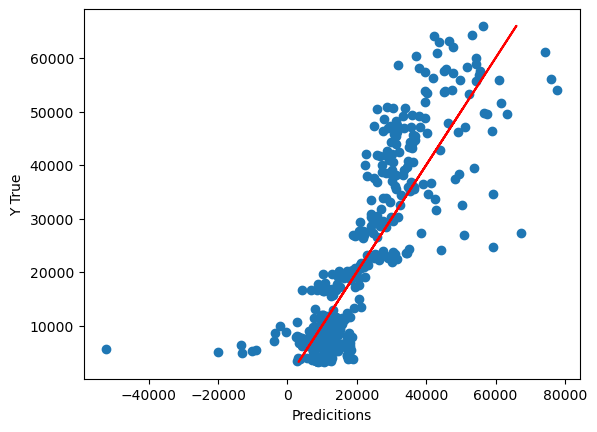

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


feats = df.drop('close', axis=1)

target = df['close']

X_train, X_test, y_train, y_test = train_test_split(feats, target,
                                                    test_size=0.25,
                                                    random_state = 42)
from sklearn.linear_model import LinearRegression

# We instanciate the model
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(feats.columns)
feats2.insert(0, 'Intercept')

coefficients = pd.DataFrame({'Estimated value': coeffs}, index=feats2)

display(coefficients)

print('Coefficient of determination of the model on the train set :', regressor.score(X_train, y_train))
print('Coefficient of determination of the model on the test set', regressor.score(X_test, y_test))


pred_test = regressor.predict(X_test)

plt.scatter(pred_test, y_test)
plt.ylabel('Y True')
plt.xlabel('Predicitions')
plt.plot(y_test,  y_test, color='r');

## DecisionTreeRegressor

score train :  1.0
score test :  0.9665163020542018


Text(0.5, 0, 'Predicitions')

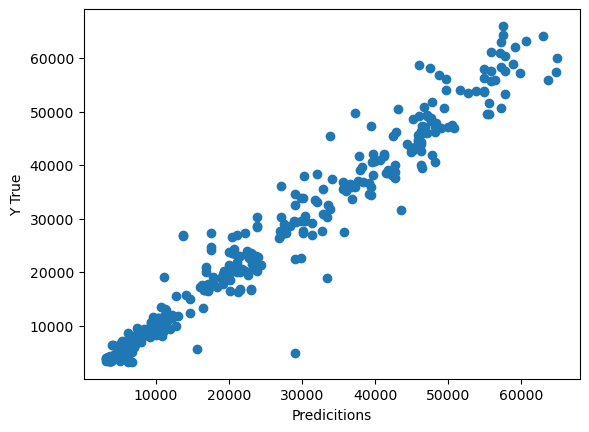

In [9]:
from sklearn.tree import DecisionTreeRegressor

feats = df.drop('close', axis=1)

target = df['close']

X_train, X_test, y_train, y_test = train_test_split(feats, target,
                                                    test_size=0.25,
                                                    random_state = 42)

#Model instantiation
dt_reg = DecisionTreeRegressor(random_state=42)

#Model training 
dt_reg.fit(X_train, y_train)

#Prediction on test data 
y_pred_test = dt_reg.predict(X_test)

print("score train : " , dt_reg.score(X_train, y_train))

print("score test : ", dt_reg.score(X_test, y_test))


plt.scatter(y_pred_test, y_test)
plt.ylabel('Y True')
plt.xlabel('Predicitions')

## Recap

In [10]:
# Recap

# Recap 
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read Daily Data and select Asset 1 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
display(df.head(3))

# Null Values
print('Null Values')
#display(df.isna().sum())

df = df.drop(['id_asset', 'timestamp', 'close_time', 'ignore'], axis=1)

df['diff_open_close'] = df.open - df.close
df['diff_high_low'] = df.high - df.low

df = df.drop(['open', 'high', 'low'], axis=1)

print(len(df['close']))

y_test_last_week = df['close'][-7:]
X_test_last_week = df.drop('close', axis=1).iloc[-7:]

df = df.iloc[:-7]
feats = df.drop('close', axis=1)
target = df['close']

X_train, X_test, y_train, y_test = train_test_split(feats, target,
                                                    test_size=0.25,
                                                    random_state = 42)

[len(i) for i in list([X_train, X_test, y_train, y_test])]
print(len(X_test + X_train))

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-08-17,1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0.0
2017-08-18,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0.0
2017-08-19,1,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0.0


Null Values
2114
2107


## Model Score Compare

In [11]:
### Linear Regression

regressor_lr = LinearRegression() 
regressor_lr.fit(X_train, y_train)

y_pred_lr = regressor_lr.predict(X_test)
y_pred_train_lr = regressor_lr.predict(X_train)

# Metrics
# Training set
mae_lr_train = mean_absolute_error(y_train, y_pred_train_lr)
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr, squared=True)
rmse_lr_train = mean_squared_error(y_train, y_pred_train_lr, squared=False)

# Test set
mae_lr_test = mean_absolute_error(y_test, y_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=True)
rmse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=False)

# Score
lr_train_score = regressor_lr.score(X_train, y_train)
lr_test_score = regressor_lr.score(X_test, y_test)

### DecisionTree

regressor_dt = DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)

y_pred_dt = regressor_dt.predict(X_test)
y_pred_train_dt = regressor_dt.predict(X_train)

# Metrics
# Training set
mae_dt_train = mean_absolute_error(y_train, y_pred_train_dt)
mse_dt_train = mean_squared_error(y_train, y_pred_train_dt, squared=True)
rmse_dt_train = mean_squared_error(y_train, y_pred_train_dt, squared=False)

# Test set
mae_dt_test = mean_absolute_error(y_test, y_pred_dt)
mse_dt_test = mean_squared_error(y_test, y_pred_dt, squared=True)
rmse_dt_test = mean_squared_error(y_test, y_pred_dt, squared=False)

# Score
dt_train_score = regressor_dt.score(X_train, y_train)
dt_test_score = regressor_dt.score(X_test, y_test)

### RandomForest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=42)
regressor_rf.fit(X_train, y_train)

# Metrics
y_pred_rf = regressor_rf.predict(X_test)
y_pred_rf_train = regressor_rf.predict(X_train)

# Training set
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train,squared=True)
rmse_rf_train = mean_squared_error(y_train, y_pred_rf_train, squared=False)

# Test set
mae_rf_test = mean_absolute_error(y_test, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf, squared=True)
rmse_rf_test = mean_squared_error(y_test, y_pred_rf, squared=False)

# Score
rf_train_score = regressor_rf.score(X_train, y_train)
rf_test_score = regressor_rf.score(X_test, y_test)


# Creation of a dataframe to compare the metrics of the two algorithms
data = {
    'MAE train': [mae_dt_train, mae_rf_train, mae_lr_train], 'MAE test': [mae_dt_test, mae_rf_test, mae_lr_test],
    'MSE train': [mse_dt_train, mse_rf_train, mse_lr_train], 'MSE test': [mse_dt_test, mse_rf_test, mse_lr_test],
    'RMSE train': [rmse_dt_train, rmse_rf_train, rmse_lr_train], 'RMSE test': [rmse_dt_test, rmse_rf_test, rmse_lr_test],
    'R2_train': [dt_train_score, rf_train_score, lr_train_score], 'R2_test': [dt_test_score, rf_test_score, lr_test_score]
}

# DataFrame

df_comp = pd.DataFrame(data, index=['Decision Tree', 'Random Forest', 'Linear Regression'])
df_comp.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R2_train,R2_test
Decision Tree,0.000000,1724.256565,0.000000e+00,1.180750e+07,0.000000,3436.203868,1.000000,0.958329
Random Forest,393.913057,1138.033091,5.140384e+05,5.827713e+06,716.964730,2414.065657,0.997998,0.979433
Linear Regression,5953.628636,6547.935118,6.613452e+07,7.862045e+07,8132.313199,8866.817506,0.742475,0.722531


In [12]:
pd.options.display.float_format = '{:,.2f}'.format

df_pred = pd.DataFrame({'Y_Real' : y_test[-7:],
                       'Prediction_Lr' : y_pred_lr[-7:],
                       'Prediction_Dt' : y_pred_dt[-7:], 
                       'Prediction_Rf' : y_pred_rf[-7:],
                       'Diff_Lr' : (y_test[-7:] - y_pred_lr[-7:]), 
                       'Diff_Dt' : (y_test[-7:] - y_pred_dt[-7:]),
                       'Diff_Rf' : (y_test[-7:] - y_pred_rf[-7:])},
                       )

df_pred

,Y_Real,Prediction_Lr,Prediction_Dt,Prediction_Rf,Diff_Lr,Diff_Dt,Diff_Rf
timestamp,,,,,,,
2018-07-05,"6,529.20","8,969.62","6,390.07","6,523.22","-2,440.42",139.13,5.98
2018-05-10,"9,002.20","13,843.71","9,310.00","9,025.18","-4,841.51",-307.80,-22.98
2021-11-25,"58,960.36","42,164.96","57,184.07","56,963.94","16,795.40","1,776.29","1,996.42"
2020-07-27,"11,029.96",184.74,"9,439.59","15,510.30","10,845.22","1,590.37","-4,480.34"
2019-05-15,"8,169.87","11,115.94","8,184.98","8,166.93","-2,946.07",-15.11,2.94
2019-11-01,"9,231.61","10,116.39","9,677.05","9,280.06",-884.78,-445.44,-48.45
2021-11-06,"61,470.61","32,067.52","63,273.59","51,381.04","29,403.09","-1,802.98","10,089.57"


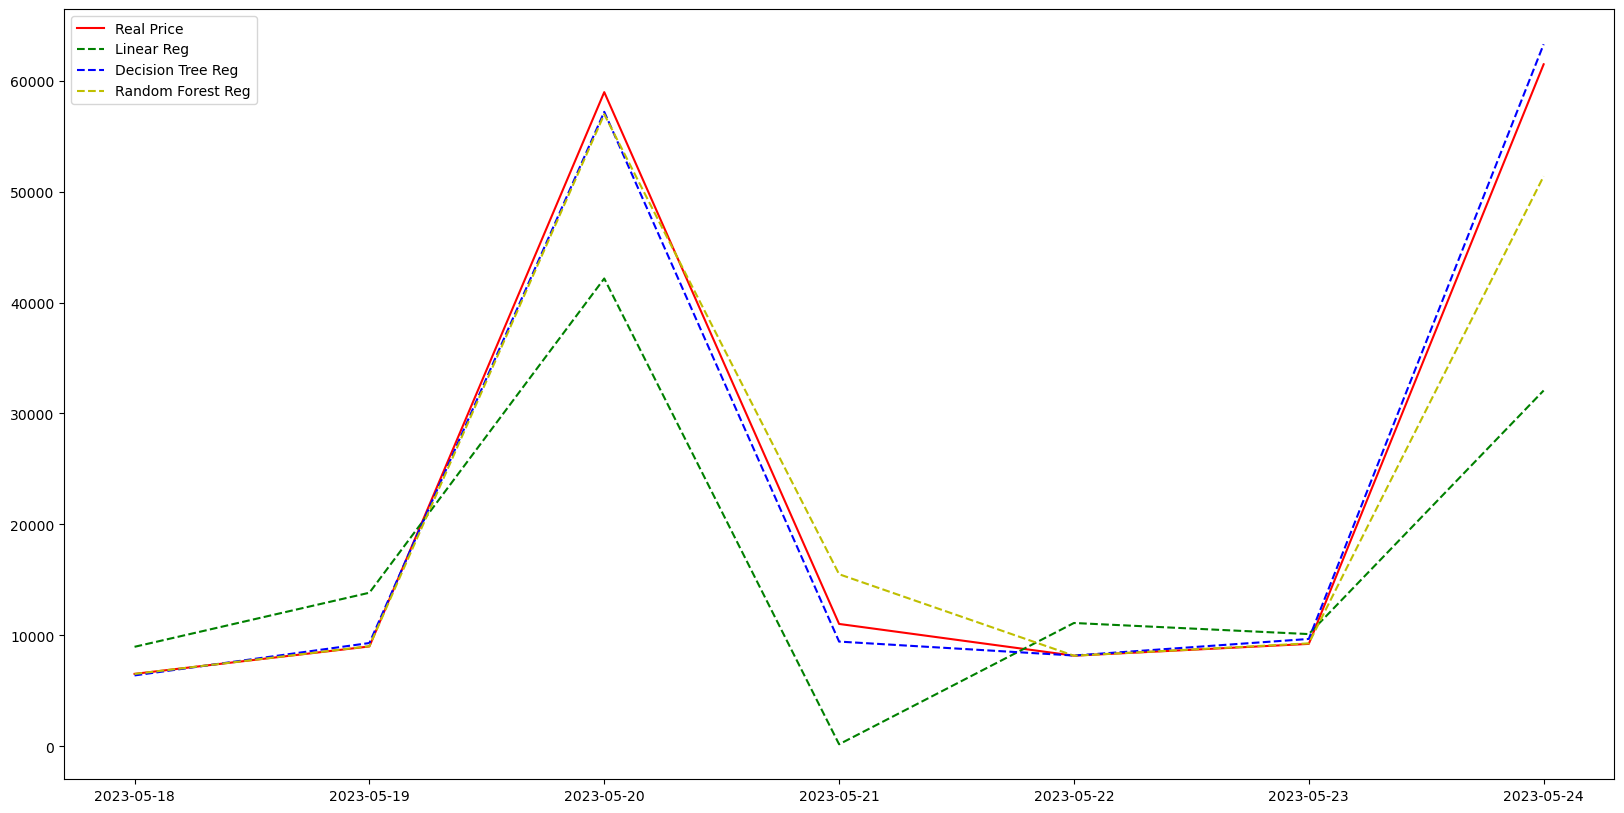

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(df.index[-7:] ,y_test[-7:], 'r', label='Real Price')
plt.plot(df.index[-7:] ,y_pred_lr[-7:], 'g--', label='Linear Reg')
plt.plot(df.index[-7:] ,y_pred_dt[-7:], 'b--', label='Decision Tree Reg')
plt.plot(df.index[-7:] ,y_pred_rf[-7:], 'y--', label='Random Forest Reg')
plt.legend();

## Prediction of Last Week 

In [14]:
### Linear Regression

X_test = X_test_last_week
y_test = y_test_last_week


regressor_lr = LinearRegression() 
regressor_lr.fit(X_train, y_train)

y_pred_lr = regressor_lr.predict(X_test)
y_pred_train_lr = regressor_lr.predict(X_train)

# Metrics
# Training set
mae_lr_train = mean_absolute_error(y_train, y_pred_train_lr)
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr, squared=True)
rmse_lr_train = mean_squared_error(y_train, y_pred_train_lr, squared=False)

# Test set
mae_lr_test = mean_absolute_error(y_test, y_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=True)
rmse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=False)

# Score
lr_train_score = regressor_lr.score(X_train, y_train)
lr_test_score = regressor_lr.score(X_test, y_test)

### DecisionTree

regressor_dt = DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)

y_pred_dt = regressor_dt.predict(X_test)
y_pred_train_dt = regressor_dt.predict(X_train)

# Metrics
# Training set
mae_dt_train = mean_absolute_error(y_train, y_pred_train_dt)
mse_dt_train = mean_squared_error(y_train, y_pred_train_dt, squared=True)
rmse_dt_train = mean_squared_error(y_train, y_pred_train_dt, squared=False)

# Test set
mae_dt_test = mean_absolute_error(y_test, y_pred_dt)
mse_dt_test = mean_squared_error(y_test, y_pred_dt, squared=True)
rmse_dt_test = mean_squared_error(y_test, y_pred_dt, squared=False)

# Score
dt_train_score = regressor_dt.score(X_train, y_train)
dt_test_score = regressor_dt.score(X_test, y_test)

### RandomForest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=42)
regressor_rf.fit(X_train, y_train)

# Metrics
y_pred_rf = regressor_rf.predict(X_test)
y_pred_rf_train = regressor_rf.predict(X_train)

# Training set
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train,squared=True)
rmse_rf_train = mean_squared_error(y_train, y_pred_rf_train, squared=False)

# Test set
mae_rf_test = mean_absolute_error(y_test, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf, squared=True)
rmse_rf_test = mean_squared_error(y_test, y_pred_rf, squared=False)

# Score
rf_train_score = regressor_rf.score(X_train, y_train)
rf_test_score = regressor_rf.score(X_test, y_test)


# Creation of a dataframe to compare the metrics of the two algorithms
data = {
    'MAE train': [mae_dt_train, mae_rf_train, mae_lr_train], 'MAE test': [mae_dt_test, mae_rf_test, mae_lr_test],
    'MSE train': [mse_dt_train, mse_rf_train, mse_lr_train], 'MSE test': [mse_dt_test, mse_rf_test, mse_lr_test],
    'RMSE train': [rmse_dt_train, rmse_rf_train, rmse_lr_train], 'RMSE test': [rmse_dt_test, rmse_rf_test, rmse_lr_test],
    'R2_train': [dt_train_score, rf_train_score, lr_train_score], 'R2_test': [dt_test_score, rf_test_score, lr_test_score]
}

# DataFrame

df_comp = pd.DataFrame(data, index=['Decision Tree', 'Random Forest', 'Linear Regression'])
df_comp.head()

,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test,R2_train,R2_test
Decision Tree,0.00,"5,889.67",0.00,"71,388,294.27",0.00,"8,449.16",1.00,-230.71
Random Forest,393.91,"3,246.36","514,038.42","22,184,069.74",716.96,"4,710.00",1.00,-71.01
Linear Regression,"5,953.63","6,184.76","66,134,517.97","39,694,603.78","8,132.31","6,300.37",0.74,-127.84


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

df_pred = pd.DataFrame({'Y_Real' : y_test,
                       'Prediction_Lr' : y_pred_lr,
                       'Prediction_Dt' : y_pred_dt, 
                       'Prediction_Rf' : y_pred_rf,
                       'Diff_Lr' : (y_test - y_pred_lr), 
                       'Diff_Dt' : (y_test - y_pred_dt),
                       'Diff_Rf' : (y_test - y_pred_rf)},
                       )

df_pred

,Y_Real,Prediction_Lr,Prediction_Dt,Prediction_Rf,Diff_Lr,Diff_Dt,Diff_Rf
timestamp,,,,,,,
2023-05-25,"26,473.79","21,151.72","28,323.76","26,740.92","5,322.07","-1,849.97",-267.13
2023-05-26,"26,705.92","20,860.26","29,468.10","27,097.63","5,845.66","-2,762.18",-391.71
2023-05-27,"26,854.27","19,124.05","11,879.95","18,323.32","7,730.22","14,974.32","8,530.95"
2023-05-28,"28,065.00","23,963.62","30,839.65","32,266.33","4,101.38","-2,774.65","-4,201.33"
2023-05-29,"27,736.40","21,890.54","30,109.93","28,221.70","5,845.86","-2,373.53",-485.30
2023-05-30,"27,694.40","20,816.76","27,033.84","26,823.88","6,877.64",660.56,870.52
2023-05-31,"27,192.67","19,622.18","11,360.20","19,215.07","7,570.49","15,832.47","7,977.60"


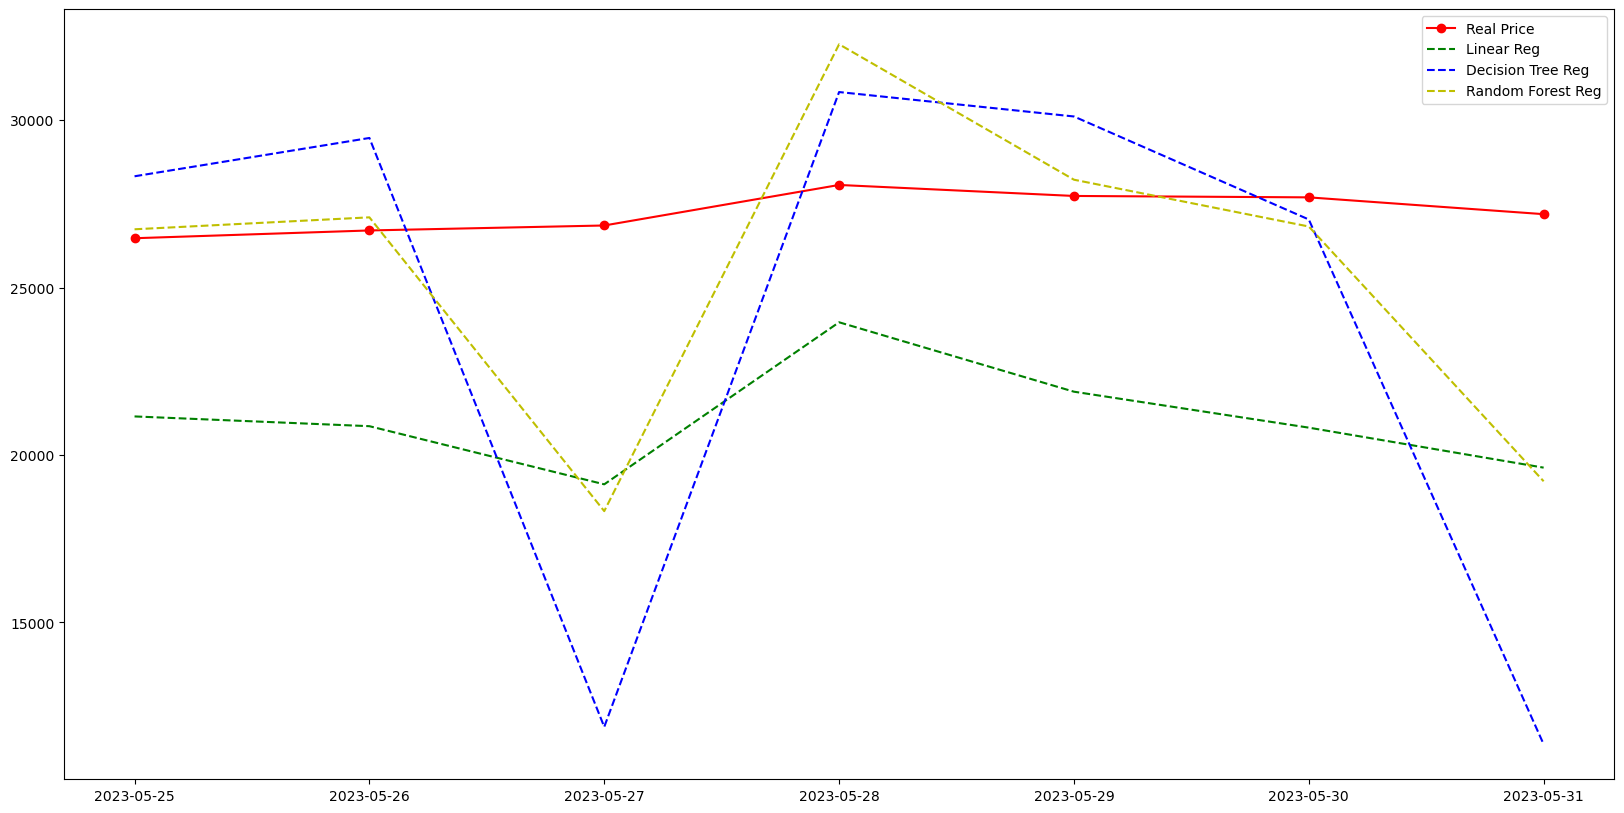

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(X_test.index ,y_test, 'r', marker= 'o', label='Real Price')
plt.plot(X_test.index ,y_pred_lr, 'g--', label='Linear Reg')
plt.plot(X_test.index ,y_pred_dt, 'b--', label='Decision Tree Reg')
plt.plot(X_test.index ,y_pred_rf, 'y--', label='Random Forest Reg')
plt.legend();